In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from sklearn.preprocessing import OneHotEncoder

In [14]:
heart_data = "../data/raw/heart_disease_health_indicators_BRFSS2015.csv"
heart_df = pd.read_csv(heart_data)

In [15]:
heart_df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [16]:
heart_df.shape

(253680, 22)

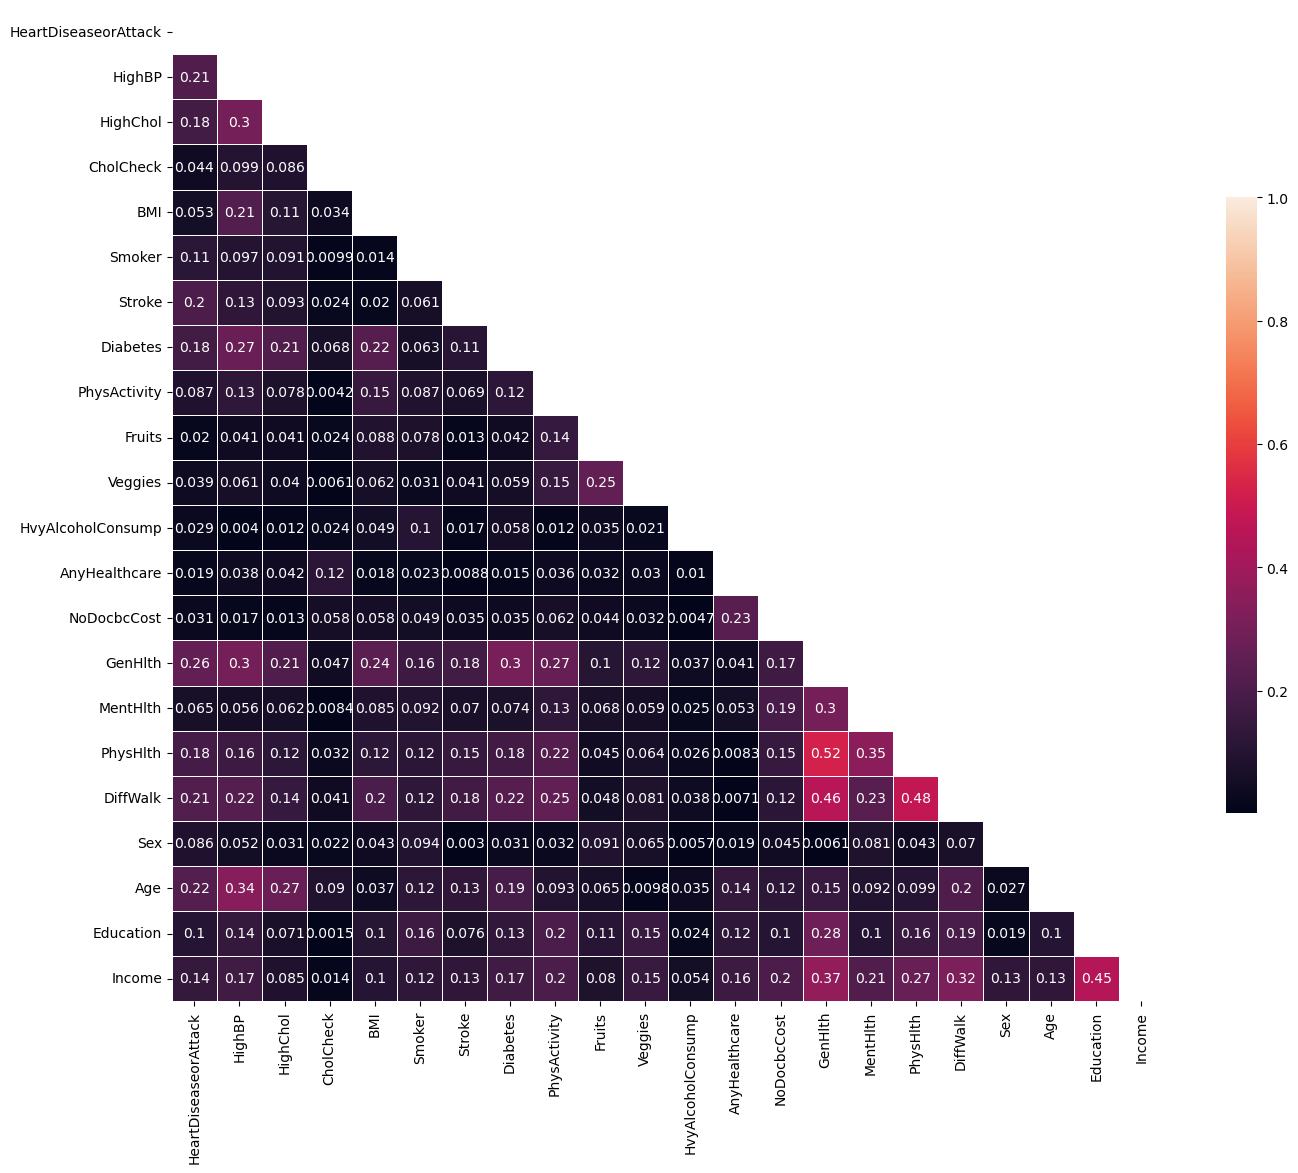

In [17]:
corr=np.abs(heart_df.corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [18]:
target = heart_df['HeartDiseaseorAttack']
num_df = heart_df.drop('HeartDiseaseorAttack', axis=1)

x_train, x_test, y_train, y_test = train_test_split(num_df, target, test_size=0.20, random_state=0)


for i in range(3, 7):
    knn = KNeighborsClassifier(n_neighbors=i)
    print(f"For {i} n_neighbours:")
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test) # This is the slowest step
    
    cm = confusion_matrix(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    print(f" Accuracy: {100*((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))): .2f}%")
    
    #print(f"The accuracy of the model vs the test with n_neighbours = {i}, is {knn.score(x_test, y_test)*100: .2f}%") # This is slow
    print(f"Cohen's Kappa: {kappa:.4f}")
    print(cm)
    print()

For 3 n_neighbours:
 Accuracy:  88.67%
Cohen's Kappa: 0.1448
[[44278  1686]
 [ 4060   712]]

For 4 n_neighbours:
 Accuracy:  90.11%
Cohen's Kappa: 0.0761
[[45435   529]
 [ 4489   283]]

For 5 n_neighbours:
 Accuracy:  89.57%
Cohen's Kappa: 0.1250
[[44917  1047]
 [ 4246   526]]

For 6 n_neighbours:
 Accuracy:  90.25%
Cohen's Kappa: 0.0698
[[45539   425]
 [ 4523   249]]



In [19]:
# Drop the column PhysHlth, because is correlated to the column GenHlth
# Drop the column DiffWalk, because is correlated to the column GenHlth
# Drop the column Education, because is correlated to the column Income
df_new = num_df.drop(['PhysHlth', 'DiffWalk','Education'],  axis=1)
df_new

#print("Setting up model")
x_train, x_test, y_train, y_test = train_test_split(df_new, target, test_size=0.20, random_state=0)

for i in range(3, 7):
    print(f"For n_neighbours: {i}")
    knn = KNeighborsClassifier(n_neighbors=i)
    #print("Fitting...")
    knn.fit(x_train, y_train)
    #print("Predicting...")
    y_pred = knn.predict(x_test) #This is the slowest step
    
    #print("Calculating metrics...")
    cm = confusion_matrix(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    
    print(f" Accuracy: {100*((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))): .2f}%")     
    print(f"Cohen's Kappa: {kappa:.4f}")
    print(cm)  
    print()

For n_neighbours: 3
 Accuracy:  88.64%
Cohen's Kappa: 0.1522
[[44220  1744]
 [ 4020   752]]

For n_neighbours: 4
 Accuracy:  90.08%
Cohen's Kappa: 0.0783
[[45407   557]
 [ 4478   294]]

For n_neighbours: 5
 Accuracy:  89.57%
Cohen's Kappa: 0.1328
[[44886  1078]
 [ 4213   559]]

For n_neighbours: 6
 Accuracy:  90.28%
Cohen's Kappa: 0.0792
[[45522   442]
 [ 4492   280]]



In [20]:
x_train.nunique()

HighBP                2
HighChol              2
CholCheck             2
BMI                  83
Smoker                2
Stroke                2
Diabetes              3
PhysActivity          2
Fruits                2
Veggies               2
HvyAlcoholConsump     2
AnyHealthcare         2
NoDocbcCost           2
GenHlth               5
MentHlth             31
Sex                   2
Age                  13
Income                8
dtype: int64

In [25]:
#Normalise all columns to be 0-1
normalizer = MinMaxScaler()
normalizer.fit(x_train)

x_train_norm = normalizer.transform(x_train)
x_test_norm = normalizer.transform(x_test)

x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns, index=x_train.index )
x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns, index=x_test.index)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_norm, y_train)


# Evaluate the model on the test set
for i in range(3, 7):
    print(f"For n_neighbors: {i}")
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_norm, y_train)
    y_pred = knn.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    
    print(f" Accuracy: {100*((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))): .2f}%")        
    print(f"Cohen's Kappa: {kappa:.4f}")   
    print(cm)
    print()

Normalising...
For n_neighbors: 3
 Accuracy:  78.87%
Cohen's Kappa: 0.1385
[[38266  7698]
 [ 3022  1750]]

For n_neighbors: 4
 Accuracy:  88.49%
Cohen's Kappa: 0.0697
[[44503  1461]
 [ 4379   393]]

For n_neighbors: 5
 Accuracy:  86.46%
Cohen's Kappa: 0.1186
[[43055  2909]
 [ 3960   812]]

For n_neighbors: 6
 Accuracy:  90.25%
Cohen's Kappa: 0.0466
[[45621   343]
 [ 4603   169]]



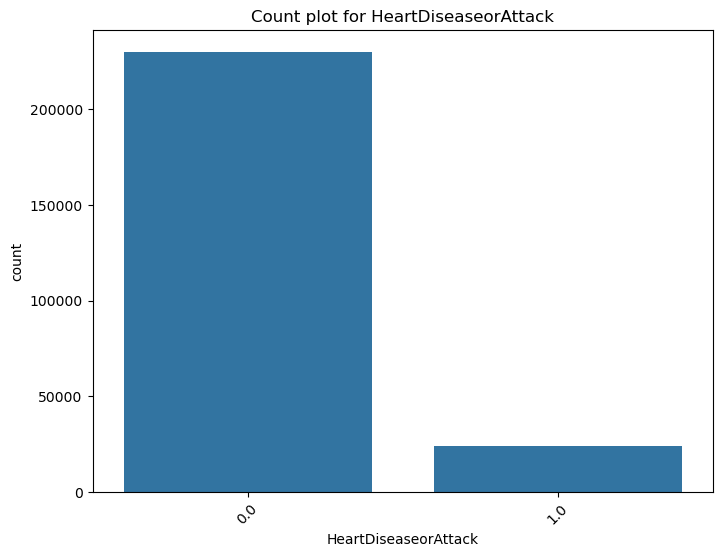

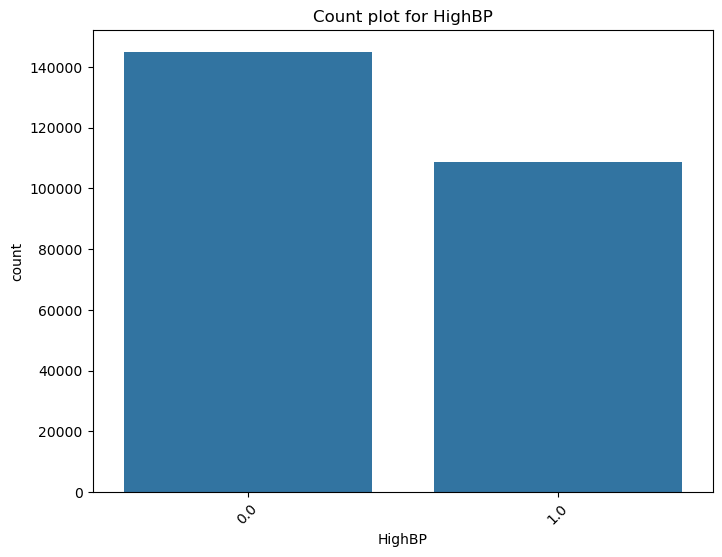

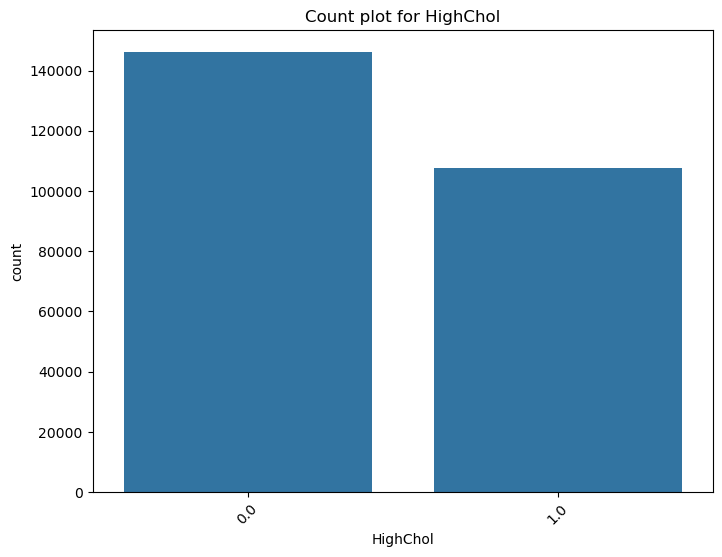

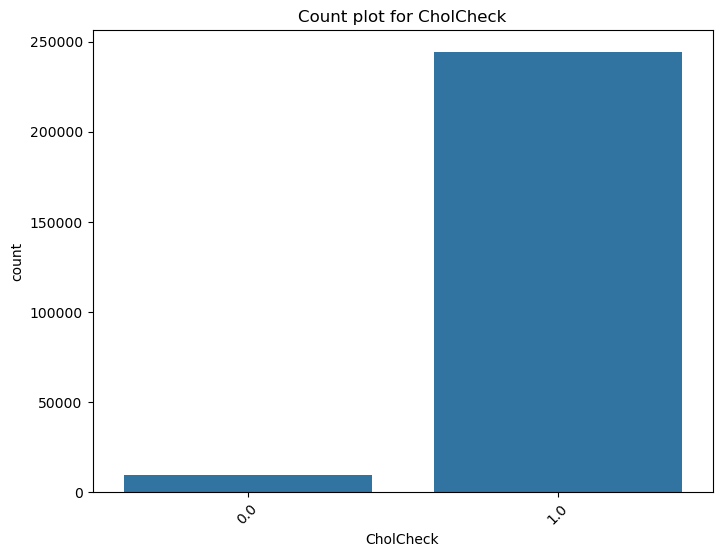

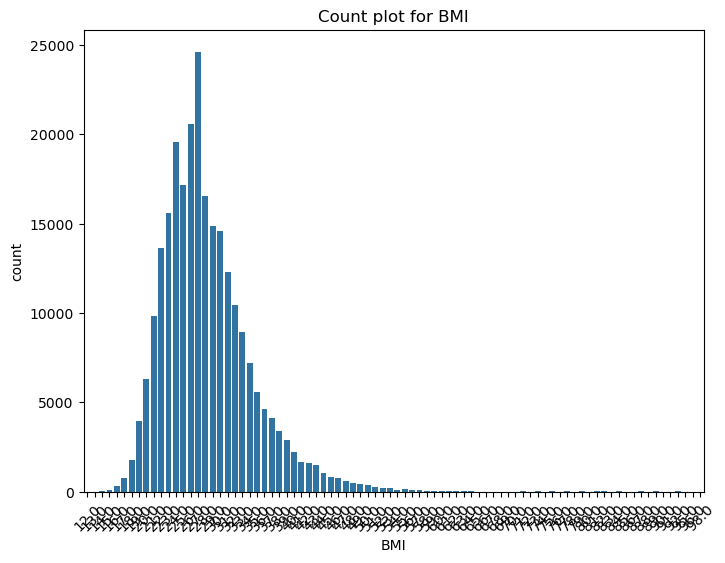

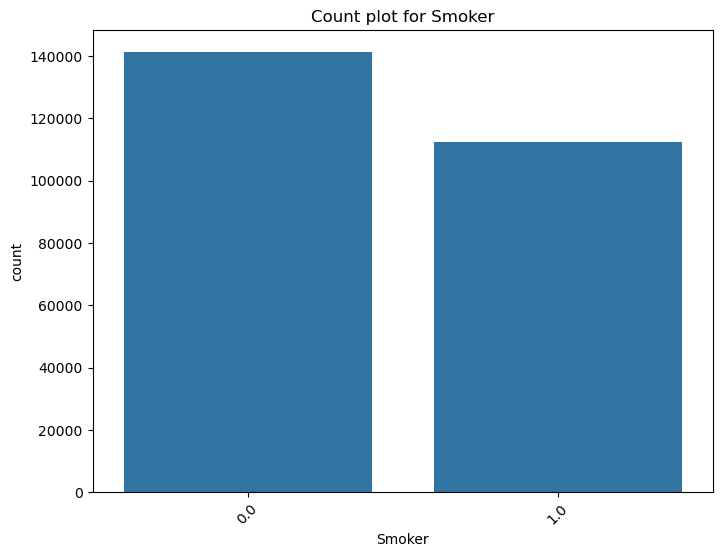

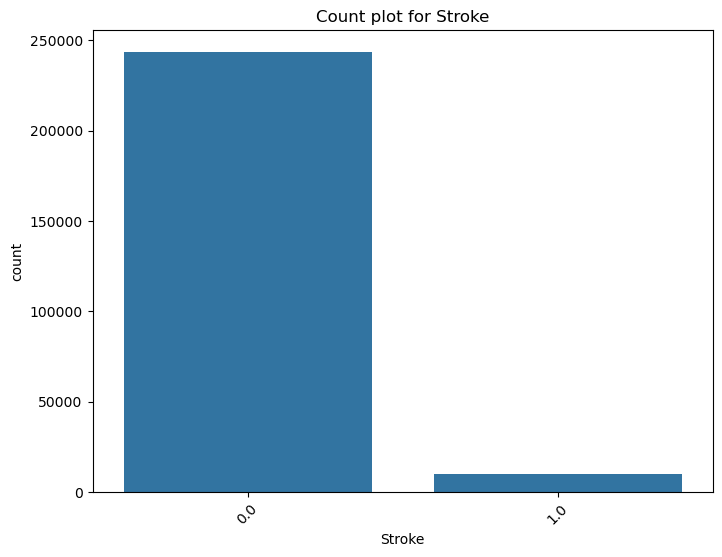

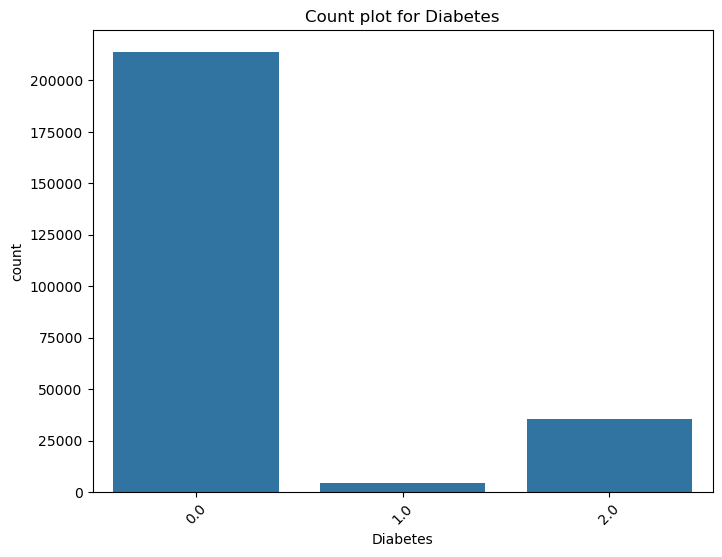

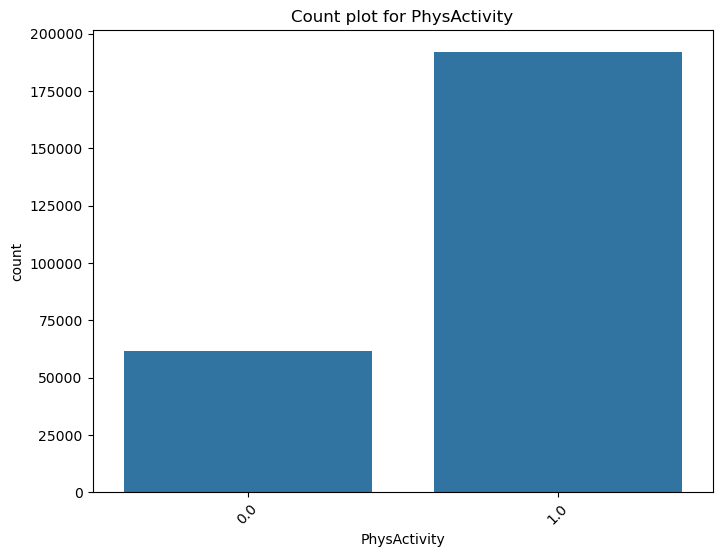

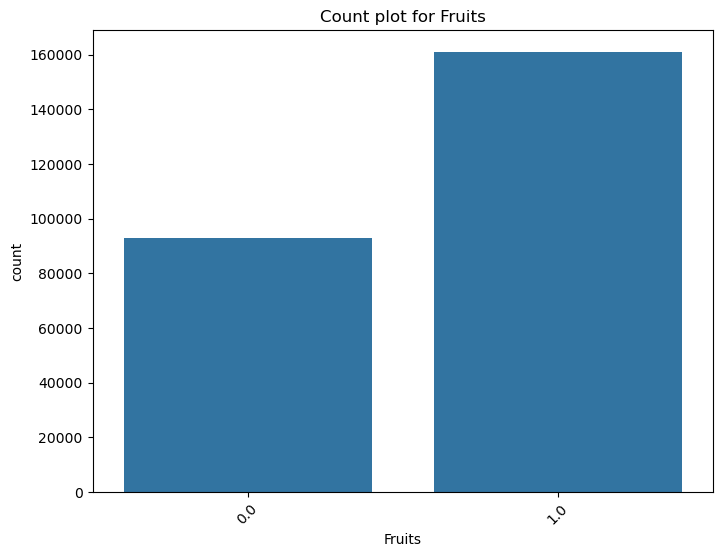

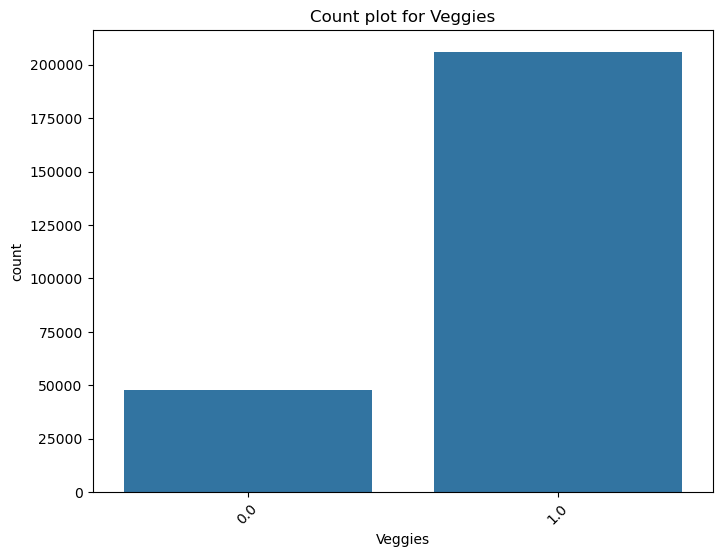

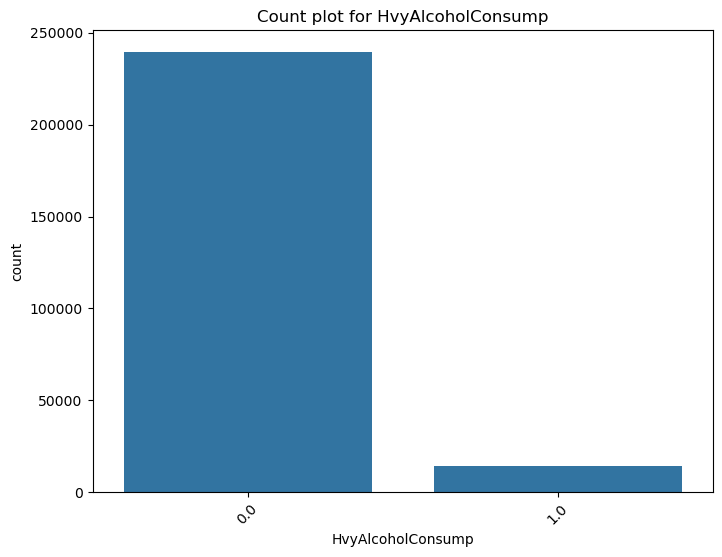

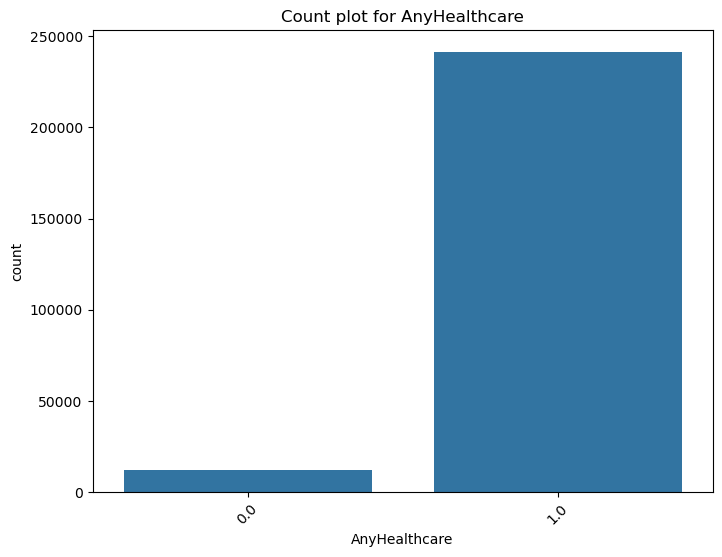

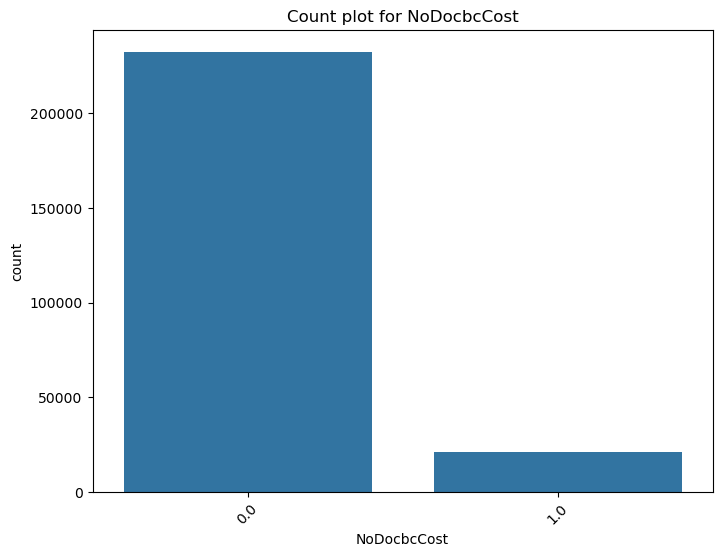

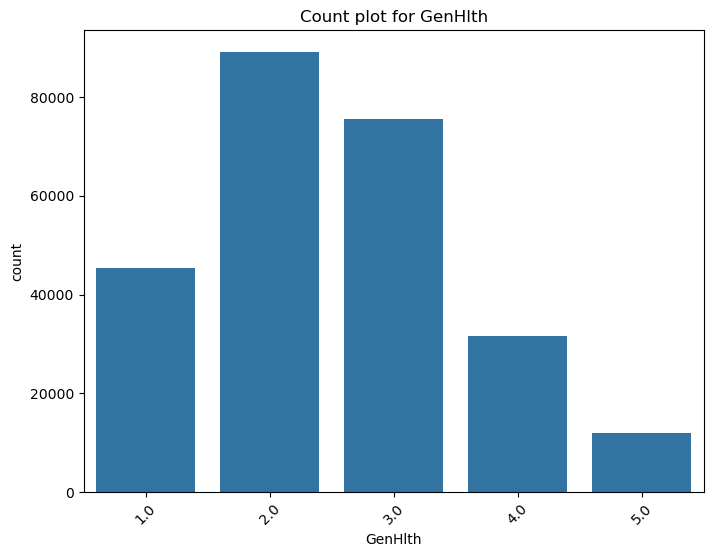

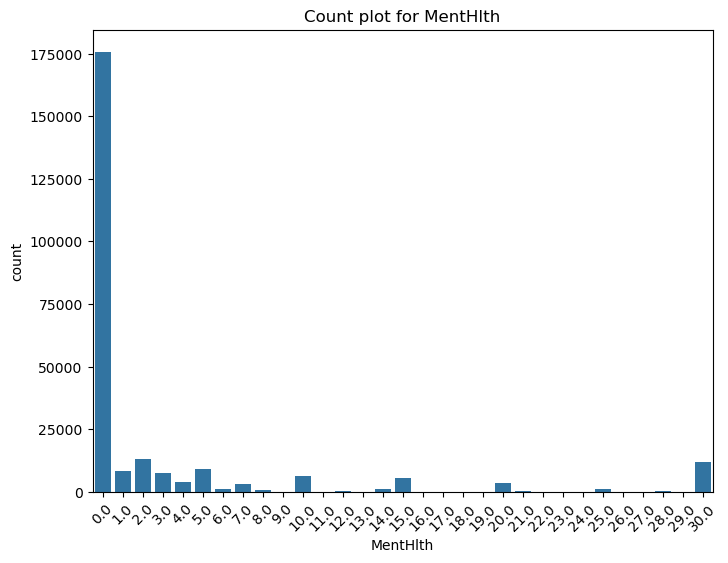

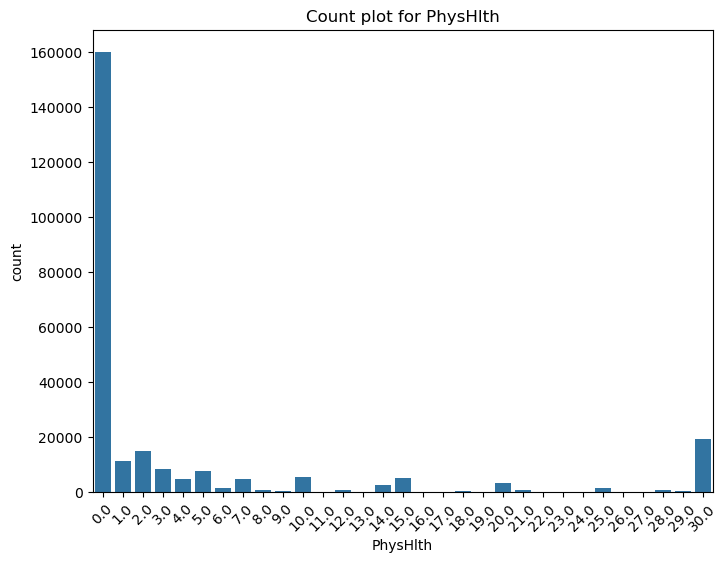

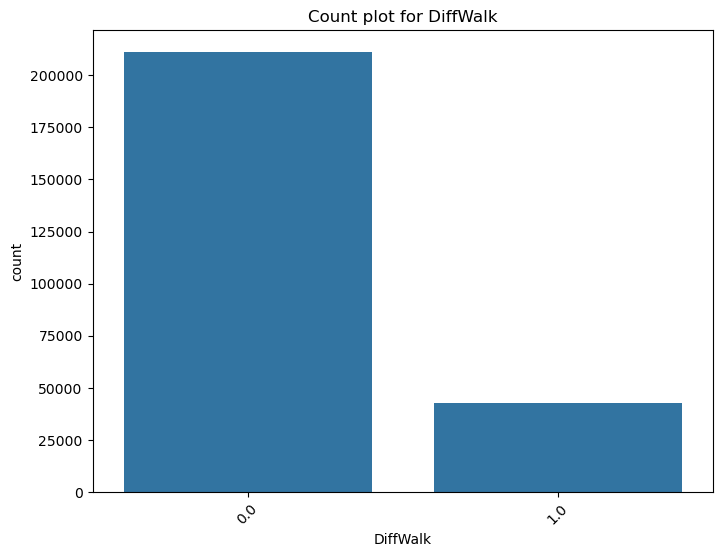

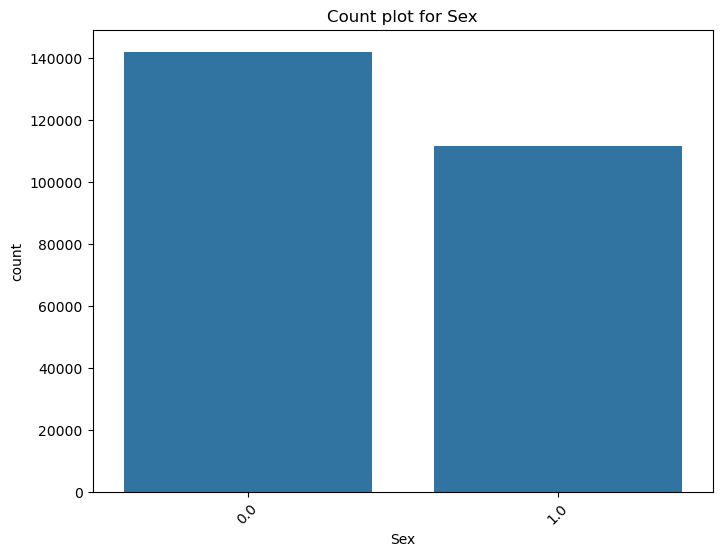

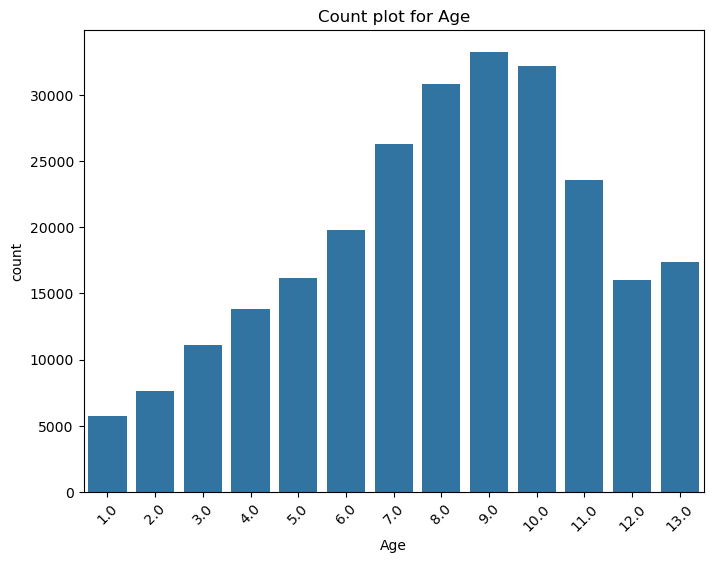

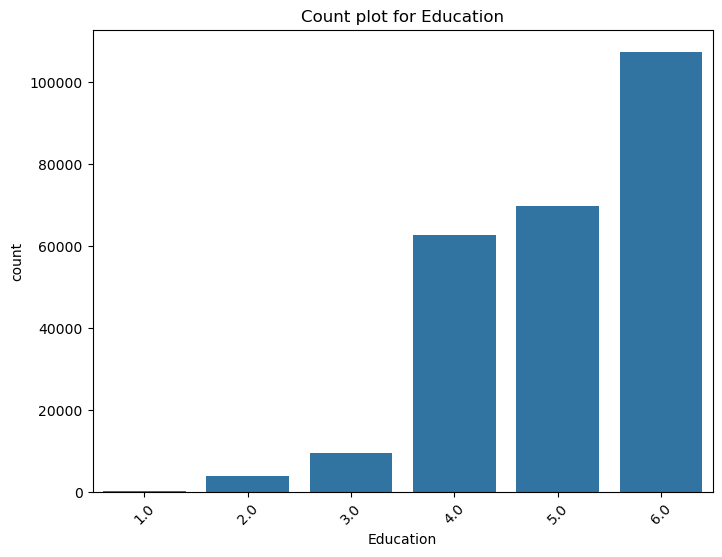

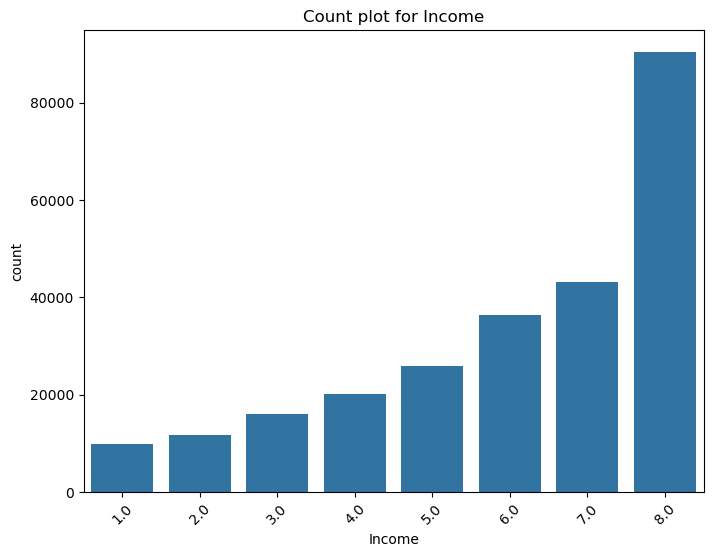

In [27]:
for col in heart_df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=heart_df, x=col)
    plt.title(f'Count plot for {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()

In [31]:
# Normalise all columns to be 0-1
normalizer = MinMaxScaler()
normalizer.fit(x_train)

x_train_norm = normalizer.transform(x_train)
x_test_norm = normalizer.transform(x_test)

x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns, index=x_train.index)
x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns, index=x_test.index)

# Evaluate the model on the test set by column
for i in range(len(x_train_norm.columns) - 1):
    col1 = x_train_norm.columns[i]
    
    for j in range(i + 1, len(x_train_norm.columns)):
        col2 = x_train_norm.columns[j]
        
        if x_train_norm[col1].nunique() < 4 and x_train_norm[col2].nunique() < 4:
            continue
        else:
            print(f"For {col1} & {col2}:")    
            knn = KNeighborsClassifier(n_neighbors=3)
            knn.fit(x_train_norm[[col1, col2]], y_train)
            y_pred = knn.predict(x_test_norm[[col1, col2]])
            
            # Confusion matrix
            cm = confusion_matrix(y_test, y_pred)
                    
            # Calculate Kappa score
            kappa = cohen_kappa_score(y_test, y_pred)
                        
            print(f" Accuracy: {100*((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))): .2f}%")
            print(f"Cohen's Kappa: {kappa:.4f}")
            print(cm)
            print()

For HighBP & BMI:
 Accuracy:  88.89%
Cohen's Kappa: 0.0350
[[44874  1090]
 [ 4546   226]]

For HighBP & GenHlth:
 Accuracy:  90.03%
Cohen's Kappa: 0.1761
[[44978   986]
 [ 4073   699]]

For HighBP & MentHlth:
 Accuracy:  90.39%
Cohen's Kappa: 0.0082
[[45823   141]
 [ 4735    37]]

For HighBP & Age:
 Accuracy:  87.41%
Cohen's Kappa: 0.1060
[[43693  2271]
 [ 4118   654]]

For HighBP & Income:
 Accuracy:  90.59%
Cohen's Kappa: 0.0000
[[45964     0]
 [ 4772     0]]

For HighChol & BMI:
 Accuracy:  90.56%
Cohen's Kappa: 0.0014
[[45941    23]
 [ 4766     6]]

For HighChol & GenHlth:
 Accuracy:  90.59%
Cohen's Kappa: 0.0000
[[45964     0]
 [ 4772     0]]

For HighChol & MentHlth:
 Accuracy:  89.85%
Cohen's Kappa: 0.0341
[[45429   535]
 [ 4616   156]]

For HighChol & Age:
 Accuracy:  90.59%
Cohen's Kappa: 0.0000
[[45964     0]
 [ 4772     0]]

For HighChol & Income:
 Accuracy:  90.59%
Cohen's Kappa: 0.0000
[[45964     0]
 [ 4772     0]]

For CholCheck & BMI:
 Accuracy:  90.55%
Cohen's Kappa: 0